# ทำการ import library ที่ต้องใช้ทั้งหมด

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# โหลดข้อมูลจาก github

In [128]:
# dataHW3 = pd.read_excel('Fire_Data.xlsx')

In [130]:
dataHW3 = pd.read_excel('https://github.com/70wenven/datasci/blob/master/Fire_Data.xlsx?raw=true')

# ทำการเช็คตาราง

In [49]:
dataHW3

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,n,1,294.4,7.2,0
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.9,0
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.2,0
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,292.7,2.9,0


# สร้างคอลัมน์ขึ้นมาใหม่

In [133]:
dataHW3['TIME'] = dataHW3['ACQ_TIME']

# ทำการแปลงค่าในคอลัมน์ให้เป็น str เพื่อทำการเชื่อมวันที่และเวลาเข้าด้วยกัน

In [137]:
dataHW3['TIME'] = dataHW3['TIME'].astype(str).str.zfill(4)

In [138]:
dataHW3['TIME'] = dataHW3['TIME'].str.slice(stop=2)+':'+dataHW3['TIME'].str.slice(start=2)

# ทำแปลงค่าคอลัมน์ให้เป็น datetime

In [139]:
dataHW3['TIME'] = pd.to_datetime(dataHW3['ACQ_DATE'].astype(str)+' '+dataHW3['TIME'])

# ทำการเช็ค dtypes

In [140]:
dataHW3.dtypes

OBJECTID               int64
LATITUDE             float64
LONGITUDE            float64
BRIGHT_TI4           float64
SCAN                 float64
TRACK                float64
ACQ_DATE      datetime64[ns]
ACQ_TIME               int64
SATELLITE             object
INSTRUMENT            object
CONFIDENCE            object
VERSION                int64
BRIGHT_TI5           float64
FRP                  float64
TYPE                   int64
dftime                 int64
TIME          datetime64[ns]
d_TIME                 int64
dtype: object

In [141]:
dataHW3[["LATITUDE","LONGITUDE","TIME"]]

,LATITUDE,LONGITUDE,TIME
0,16.33696,98.70137,2019-12-01 06:35:00
1,16.48906,98.73961,2019-12-01 06:35:00
2,16.93571,99.06874,2019-12-01 06:35:00
3,16.54092,98.59869,2019-12-01 06:35:00
4,16.87473,98.63222,2019-12-01 06:35:00
...,...,...,...
79229,17.81812,97.74127,2020-04-04 20:03:00
79230,17.77545,97.85637,2020-04-04 20:03:00
79231,17.76847,97.79116,2020-04-04 20:03:00
79232,17.77518,97.82606,2020-04-04 20:03:00


# สร้างตารางใหม่ขึ้นมาเพื่อเก็บค่าโดยจะทำการแปลงเวลาให้เป็นหน่วยเดียวกัน

In [148]:
dataHW3['dftime']=dataHW3['TIME']-dataHW3['TIME'].iloc[0]

In [150]:
dataHW3['dfday'] = (dataHW3['dftime'].dt.total_seconds())/86400

# ให้แสดงแค่ 5 วัน 

In [151]:
dataHW3.head(400)

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,dftime,TIME,d_TIME,dfday,dfdays
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0,0 days 00:00:00,2019-12-01 06:35:00,635,0.000000,0 days 00:00:00
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0,0 days 00:00:00,2019-12-01 06:35:00,635,0.000000,0 days 00:00:00
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0,0 days 00:00:00,2019-12-01 06:35:00,635,0.000000,0 days 00:00:00
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0,0 days 00:00:00,2019-12-01 06:35:00,635,0.000000,0 days 00:00:00
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0,0 days 00:00:00,2019-12-01 06:35:00,635,0.000000,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,18.52934,98.95547,329.5,0.44,0.46,2019-12-05,701,N,VIIRS,n,1,298.2,2.9,0,4 days 00:26:00,2019-12-05 07:01:00,701,4.018056,4 days 00:26:00
396,397,19.67583,100.26594,335.0,0.55,0.51,2019-12-05,701,N,VIIRS,n,1,299.0,5.4,0,4 days 00:26:00,2019-12-05 07:01:00,701,4.018056,4 days 00:26:00
397,398,19.52020,100.11665,299.9,0.32,0.55,2019-12-05,1931,N,VIIRS,n,1,284.8,0.3,0,4 days 12:56:00,2019-12-05 19:31:00,1931,4.538889,4 days 12:56:00
398,399,19.51522,100.11551,322.8,0.32,0.55,2019-12-05,1931,N,VIIRS,n,1,285.5,1.1,0,4 days 12:56:00,2019-12-05 19:31:00,1931,4.538889,4 days 12:56:00


In [152]:
dataHW=dataHW3.head(400)

# ทำการพล็อตตารางแสดงค่า

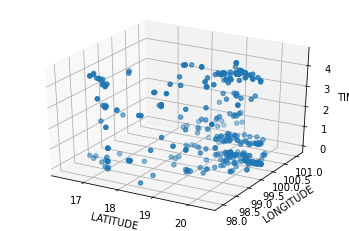

In [154]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(dataHW.LATITUDE,dataHW.LONGITUDE,dataHW.dfday) 
threedee.set_xlabel('LATITUDE') 
threedee.set_ylabel('LONGITUDE')
threedee.set_zlabel('TIME')
plt.show()